## Sound wave simulation

<IPython.core.display.Javascript object>


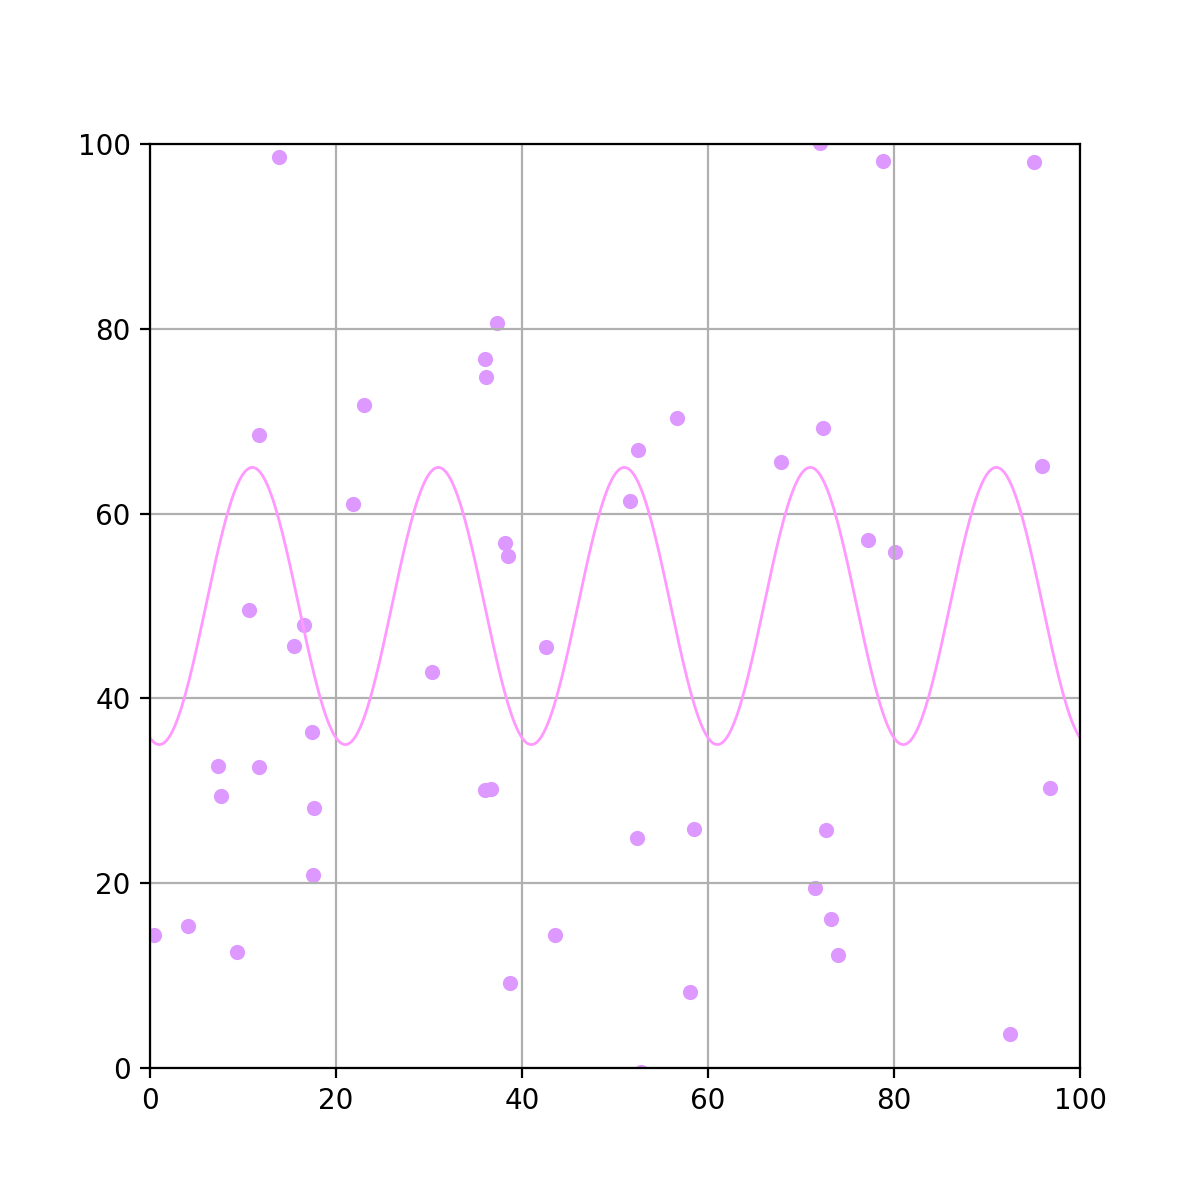

In [78]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random
import math

WIDTH, HEIGHT = 100, 100
NUM_MOLECULES = 50
MOLECULE_RADIUS = 1
MOLECULE_SPEED = 1.5
WAVE_SPEED = 2
WAVE_AMPLITUDE = 1.5
WAVE_WAVELENGTH = 20

class Molecule:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

    def move(self, time):
        wave_position = WAVE_SPEED * time
        wave_amplitude_at_x = WAVE_AMPLITUDE * math.sin(
            2 * math.pi * (self.x - wave_position) / WAVE_WAVELENGTH
        )
        speed_factor = 1 + 0.3 * wave_amplitude_at_x
        self.vx *= speed_factor
        self.vy *= speed_factor

        self.x += self.vx
        self.y += self.vy

        speed = math.sqrt(self.vx ** 2 + self.vy ** 2)
        if speed != 0:
            self.vx = (self.vx / speed) * MOLECULE_SPEED
            self.vy = (self.vy / speed) * MOLECULE_SPEED
        if self.x - MOLECULE_RADIUS <= 0 or self.x + MOLECULE_RADIUS >= WIDTH:
            self.vx *= -1
        if self.y - MOLECULE_RADIUS <= 0 or self.y + MOLECULE_RADIUS >= HEIGHT:
            self.vy *= -1

molecules = []
for _ in range(NUM_MOLECULES):
    x = random.uniform(MOLECULE_RADIUS, WIDTH - MOLECULE_RADIUS)
    y = random.uniform(MOLECULE_RADIUS, HEIGHT - MOLECULE_RADIUS)
    angle = random.uniform(0, 2 * math.pi)
    vx = MOLECULE_SPEED * math.cos(angle)
    vy = MOLECULE_SPEED * math.sin(angle)
    molecules.append(Molecule(x, y, vx, vy))

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, WIDTH)
ax.set_ylim(0, HEIGHT)
ax.grid()

wave_line, = ax.plot([], [], color='#ff99ff', lw=1)
scat = ax.scatter([], [], s=MOLECULE_RADIUS * 20, color='#dd99ff')

def update(frame):
    time = frame  
    x_data, y_data = [], []

    for molecule in molecules:
        molecule.move(time)
        x_data.append(molecule.x)
        y_data.append(molecule.y)

    scat.set_offsets(np.c_[x_data, y_data])

    x_wave = np.linspace(0, WIDTH, 500)
    y_wave = HEIGHT / 2 + WAVE_AMPLITUDE * np.sin(
        2 * np.pi * (x_wave - WAVE_SPEED * time) / WAVE_WAVELENGTH
    ) * 10
    wave_line.set_data(x_wave, y_wave)

    return scat, wave_line

ani = FuncAnimation(fig, update, frames=200, interval=1000, blit=True)
plt.show()


In [77]:
import pandas as pd

WIDTH, HEIGHT = 100, 100
NUM_MOLECULES = 50
MOLECULE_RADIUS = 1
MOLECULE_SPEED = 1.5
WAVE_SPEED = 2
WAVE_AMPLITUDES = [1, 1.5, 2]  
WAVELENGTHS = [10, 20, 40, 60, 80]  
PRESSURES = [1, 2, 3] 
TEMPERATURES = [300, 400, 500]  
TIME_STEPS = 200
REFERENCE_TEMP = 300  

class Molecule:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.collisions = 0 

    def move(self, time, wavelength, amplitude, temperature, pressure):
        wave_position = WAVE_SPEED * time
        wave_amplitude_at_x = amplitude * math.sin(2 * math.pi * (self.x - wave_position) / wavelength)
        
        speed_factor = 1 + 0.3 * wave_amplitude_at_x
        self.vx *= speed_factor
        self.vy *= speed_factor

        temp_factor = math.sqrt(temperature / REFERENCE_TEMP)
        self.vx *= temp_factor
        self.vy *= temp_factor
        self.x += self.vx
        self.y += self.vy

        speed = math.sqrt(self.vx**2 + self.vy**2)
        if speed != 0:
            self.vx = (self.vx / speed) * MOLECULE_SPEED
            self.vy = (self.vy / speed) * MOLECULE_SPEED
        if self.x - MOLECULE_RADIUS <= 0 or self.x + MOLECULE_RADIUS >= WIDTH:
            self.vx *= -1
            self.collisions += 1 * pressure
        if self.y - MOLECULE_RADIUS <= 0 or self.y + MOLECULE_RADIUS >= HEIGHT:
            self.vy *= -1
            self.collisions += 1 * pressure


def create_molecules():
    molecules = []
    for _ in range(NUM_MOLECULES):
        x = random.uniform(MOLECULE_RADIUS, WIDTH - MOLECULE_RADIUS)
        y = random.uniform(MOLECULE_RADIUS, HEIGHT - MOLECULE_RADIUS)
        angle = random.uniform(0, 2 * math.pi)
        vx = MOLECULE_SPEED * math.cos(angle)
        vy = MOLECULE_SPEED * math.sin(angle)
        molecules.append(Molecule(x, y, vx, vy))
    return molecules


def simulate(wavelength, amplitude, temperature, pressure):
    molecules = create_molecules()
    total_speed_change = 0
    total_displacement = 0
    total_energy_variation = 0
    total_collisions = 0

    for time in range(TIME_STEPS):
        speed_sum = 0
        displacement_sum = 0
        energy_sum = 0

        for molecule in molecules:
            initial_x, initial_y = molecule.x, molecule.y
            molecule.move(time, wavelength, amplitude, temperature, pressure)
            speed = math.sqrt(molecule.vx**2 + molecule.vy**2)
            speed_sum += speed
            displacement_sum += math.sqrt((molecule.x - initial_x)**2 + (molecule.y - initial_y)**2)
            energy_sum += 0.5 * speed**2
            total_collisions += molecule.collisions

        avg_speed = speed_sum / NUM_MOLECULES
        avg_displacement = displacement_sum / NUM_MOLECULES
        avg_energy_variation = energy_sum / NUM_MOLECULES
        total_speed_change += avg_speed - MOLECULE_SPEED
        total_displacement += avg_displacement
        total_energy_variation += avg_energy_variation

    avg_speed_change = total_speed_change / TIME_STEPS
    avg_displacement_final = total_displacement / TIME_STEPS
    avg_energy_final = total_energy_variation / TIME_STEPS
    avg_collision_rate = total_collisions / (NUM_MOLECULES * TIME_STEPS)

    return avg_speed_change, avg_displacement_final, avg_energy_final, avg_collision_rate


data = []
for wavelength in WAVELENGTHS:
    for amplitude in WAVE_AMPLITUDES:
        for temperature in TEMPERATURES:
            for pressure in PRESSURES:
                avg_speed_change, avg_displacement, avg_energy, avg_collisions = simulate(
                    wavelength, amplitude, temperature, pressure
                )
                data.append({
                    "Wavelength": wavelength,
                    "Amplitude": amplitude,
                    "Temperature": temperature,
                    "Pressure": pressure,
                    "Avg Speed Change": round(avg_speed_change, 4),
                    "Avg Displacement": round(avg_displacement, 4),
                    "Avg Energy": round(avg_energy, 4),
                    "Collision Rate": round(avg_collisions, 4)
                })

df = pd.DataFrame(data)
print(df)


     Wavelength  Amplitude  Temperature  Pressure  Avg Speed Change  \
0            10        1.0          300         1               0.0   
1            10        1.0          300         2               0.0   
2            10        1.0          300         3               0.0   
3            10        1.0          400         1               0.0   
4            10        1.0          400         2               0.0   
..          ...        ...          ...       ...               ...   
130          80        2.0          400         2               0.0   
131          80        2.0          400         3               0.0   
132          80        2.0          500         1               0.0   
133          80        2.0          500         2               0.0   
134          80        2.0          500         3               0.0   

     Avg Displacement  Avg Energy  Collision Rate  
0              1.5348       1.125          2.5352  
1              1.5411       1.125          